In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

# Machine Learning Demo

* Pytorch
    * Tensor example
    * Training a Neural Network
    * Training a Recurrent Neural Network
    * Training an encoder-decoder network

## Pytorch
- Pytorch is a popular deep learning library used by researchers.
- Originally developed by research scientists at Facebook
- Open source project

In [2]:
# Standard Python Libraries
import json
import random

# Pytorch API
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Numpy/Matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Our modules
import ml_utils
import Models

## Tensors
- Perform operations on Tensors (like TensorFlow)
- Vector is 1D Tensor, Matrix is 2D Tensor, etc...
- Keeps track of gradients

In [328]:
tensor = torch.randn(10, 2, requires_grad=True)
print(tensor)
print("\nSize: {}".format(tensor.size()))

tensor([[-0.4849,  1.1313],
        [ 0.0326, -1.5091],
        [ 0.3065, -0.1132],
        [ 1.4951, -0.5551],
        [ 0.6564, -0.9216],
        [-0.9002,  0.9515],
        [ 0.9507, -2.6785],
        [ 2.1392, -2.8266],
        [-0.8495, -1.4774],
        [-0.9022, -1.1654]], requires_grad=True)

Size: torch.Size([10, 2])


### Can reshape the tensor

In [329]:
tensor2 = tensor.view(-1, 1, 2)
print(tensor)
print("\nSize: {}".format(tensor2.size()))

tensor([[-0.4849,  1.1313],
        [ 0.0326, -1.5091],
        [ 0.3065, -0.1132],
        [ 1.4951, -0.5551],
        [ 0.6564, -0.9216],
        [-0.9002,  0.9515],
        [ 0.9507, -2.6785],
        [ 2.1392, -2.8266],
        [-0.8495, -1.4774],
        [-0.9022, -1.1654]], requires_grad=True)

Size: torch.Size([10, 1, 2])


### Perform tensor operation (add 1)

In [330]:
tensor3 = 2*tensor + 1
out = tensor3.mean()

print(tensor3)

print("Mean: {}".format(out))

tensor([[ 0.0302,  3.2626],
        [ 1.0652, -2.0183],
        [ 1.6131,  0.7736],
        [ 3.9902, -0.1103],
        [ 2.3128, -0.8433],
        [-0.8003,  2.9029],
        [ 2.9014, -4.3571],
        [ 5.2784, -4.6533],
        [-0.6990, -1.9549],
        [-0.8043, -1.3308]], grad_fn=<AddBackward0>)
Mean: 0.32795435190200806


In [331]:
out.backward()
print(tensor.grad)

tensor([[0.1000, 0.1000],
        [0.1000, 0.1000],
        [0.1000, 0.1000],
        [0.1000, 0.1000],
        [0.1000, 0.1000],
        [0.1000, 0.1000],
        [0.1000, 0.1000],
        [0.1000, 0.1000],
        [0.1000, 0.1000],
        [0.1000, 0.1000]])


## Example Neural Network
- Inherit from nn.Module
- Define $__init__$ and forward functions

In [300]:
class NeuralNetwork(nn.Module):
    
    def __init__(self, input_size, output_size, hidden_sizes = (32, 16)):
        super(NeuralNetwork, self).__init__()
        
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_sizes = hidden_sizes
        
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], output_size)
        
    def forward(self, input):
        
        output = F.relu(self.fc1(input))
        output = F.relu(self.fc2(output))
        output = self.fc3(output)
            
        return output

## Train a NN to predict quadratic function

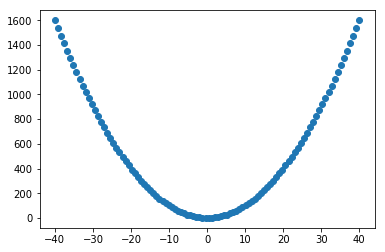

In [301]:
x = torch.linspace(-40, 40, 100)
y = x ** 2

plt.scatter(x, y)

### Conduct Training
- Define loss function
- Define optimizer

torch.Size([100, 1])
Epoch: 1000, Loss: 143.38900756835938
Epoch: 2000, Loss: 83.1316909790039
Epoch: 3000, Loss: 19.836437225341797
Epoch: 4000, Loss: 4.388768196105957
Epoch: 5000, Loss: 1.7930325269699097
Epoch: 6000, Loss: 1.379044532775879
Epoch: 7000, Loss: 0.907077968120575


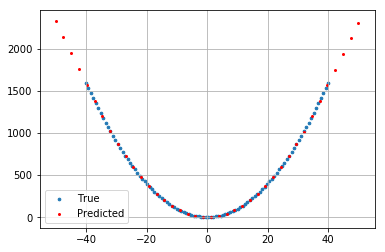

In [302]:
def NN_experiment(x, y):
    x = x.view(-1, 1)
    y = y.view(-1, 1)

    print(x.size())
    
    input_size = 1
    output_size = 1
    hidden_sizes = (64, 32)

    NN = NeuralNetwork(input_size=input_size, output_size=output_size, hidden_sizes=hidden_sizes)

    lr = 0.0006
    epochs = 7000

    criterion = nn.SmoothL1Loss()        
    optimizer = optim.Adam(NN.parameters(), lr = lr)

    try:
        for epoch in range(1, epochs + 1):

            output = NN(x)

            loss = criterion(output, y)

            if epoch % 1000 == 0:
                print("Epoch: {}, Loss: {}".format(epoch, loss))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        return NN     

    except KeyboardInterrupt:
        pass
    
NN = NN_experiment(x, y)

new_x = torch.linspace(-50, 50, 40).view(-1, 1)
output = NN(new_x)

plt.scatter(x, y, label = 'True', s = 7)
plt.scatter(new_x[:, 0], output.detach().numpy()[:,0], label = 'Predicted', color = 'red', s = 4)
plt.legend()
plt.grid()

## Load sample heart rate data

In [303]:
input_file = '../api/sample_data/ml_input_foo.json'

y = ml_utils.parse_input_file(input_file)

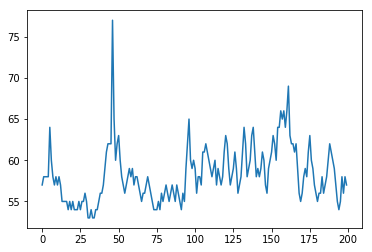

In [338]:
plt.plot(y)

In [360]:
y.size()

torch.Size([200, 1])

## Split into train and test sets

In [194]:
def train_test_split(y, test_size = 0.2, shuffle = True):
    
    size_y = len(y)
    
    t = torch.arange(size_y).float()
    
    num_test = int(test_size * size_y)
    
    # t_train, y_train, t_test, y_test
    return t[:-num_test], y[:-num_test], t[-num_test:], y[-num_test:]

In [195]:
train_t, train_y, test_t, test_y = train_test_split(y)

## Visualize

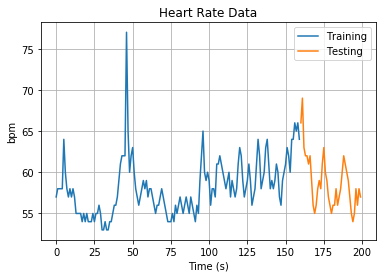

In [196]:
def plot_train_test_data(train_t, train_y, test_t, test_y):
    plt.title("Heart Rate Data")
    plt.plot(train_t.numpy(), train_y.numpy(), label = 'Training')
    plt.plot(test_t.numpy(), test_y.numpy(), label = 'Testing')
    plt.ylabel("bpm")
    plt.xlabel("Time (s)")
    plt.grid()
    plt.legend()
    
plot_train_test_data(train_t, train_y, test_t, test_y)

## Train Regular NN

In [198]:
NN = NN_experiment(train_t, train_y)

torch.Size([160, 1])
Epoch: 1000, Loss: 1.4226291179656982
Epoch: 2000, Loss: 1.4208087921142578
Epoch: 3000, Loss: 1.417464256286621
Epoch: 4000, Loss: 1.416619062423706
Epoch: 5000, Loss: 1.4205241203308105
Epoch: 6000, Loss: 1.4160776138305664
Epoch: 7000, Loss: 1.4181946516036987


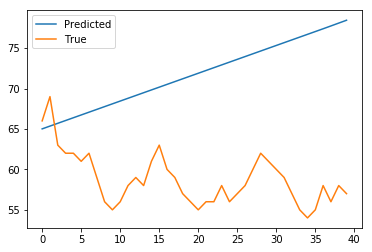

In [203]:
pred_y = NN(test_t.view(-1, 1))

plt.plot(pred_y.detach().numpy(), label = 'Predicted')
plt.plot(test_y.detach().numpy(), label = 'True')
plt.legend()

## Try Recurrent Neural Network

In [204]:
%%time

input_dimension = 1
hidden_dimension = 64
output_dimension = 1

model = Models.RNN(input_dimension, hidden_dimension, output_dimension)

CPU times: user 1.57 ms, sys: 4.43 ms, total: 6 ms
Wall time: 11.8 ms


In [207]:
model.mytrain(train_y, lr = 0.0003, epochs = 10000, teacher_forcing_ratio = 1, verbose = True)

Epoch: 100, Loss: 774.9176635742188, Teaching Forcing: True
Epoch: 200, Loss: 760.0436401367188, Teaching Forcing: True
Epoch: 300, Loss: 730.1002807617188, Teaching Forcing: True
Epoch: 400, Loss: 670.58837890625, Teaching Forcing: True
Epoch: 500, Loss: 660.802001953125, Teaching Forcing: True
Epoch: 600, Loss: 653.9156494140625, Teaching Forcing: True
Epoch: 700, Loss: 648.5752563476562, Teaching Forcing: True
Epoch: 800, Loss: 624.814208984375, Teaching Forcing: True
Epoch: 900, Loss: 603.7471923828125, Teaching Forcing: True
Epoch: 1000, Loss: 600.6865844726562, Teaching Forcing: True
Epoch: 1100, Loss: 601.2238159179688, Teaching Forcing: True
Epoch: 1200, Loss: 679.0946044921875, Teaching Forcing: True
Epoch: 1300, Loss: 600.1788330078125, Teaching Forcing: True
Epoch: 1400, Loss: 597.3898315429688, Teaching Forcing: True
Epoch: 1500, Loss: 598.788330078125, Teaching Forcing: True
Epoch: 1600, Loss: 595.9494018554688, Teaching Forcing: True
Epoch: 1700, Loss: 595.3353271484375, 

## Predict 

In [348]:
def predict(model, y, future = 50, plot = True):

    hidden_states = model.initHidden()

    input_y = y[:-1]

    outputs = []
    for input in input_y.view(-1,1,1):
        output, hidden_states = model(input, hidden_states)
        outputs.append(output)

    future_outputs = [output]
    for _ in range(future):
        output, hidden_states = model(output, hidden_states)
        future_outputs.append(output)
        
    if plot:
        all_outputs = np.array(outputs + future_outputs)
        inputs = np.array(outputs)
        
        plt.plot(inputs[3:], label = 'Training', linewidth = 3)
        plt.plot(all_outputs[3:], label = 'Future Prediction', linewidth = 1)
        #plt.legend()
        #plt.grid()

    return torch.Tensor(future_outputs).view(-1, 1)

### Predict 50 seconds in the future

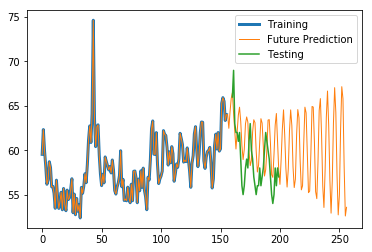

In [358]:
_ = predict(model, train_y, future = 100)
plt.plot(test_t.numpy(), test_y.numpy(), label = 'Testing')
plt.legend()
#plot_train_test_data(train_t, train_y, test_t, test_y)

# Easy to Save and Load Models

## Save Model

In [351]:
def saveModel(model, output_file):
    torch.save(model, output_file)
    
model_filename = 'model.pt'

saveModel(model, model_filename)

## Load Model

In [352]:
def loadModel(input_file):
    model = torch.load(input_file)
    model.eval()
    return model

model2 = loadModel(model_filename)

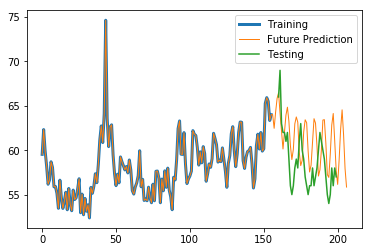

In [353]:
_ = predict(model, train_y, future = 50)
plt.plot(test_t.numpy(), test_y.numpy(), label = 'Testing')
plt.legend()

## Heart Rate Data from Adam

16127


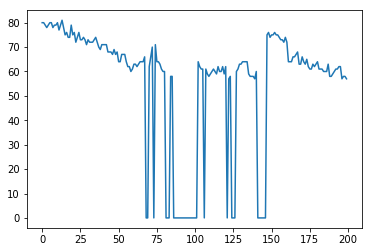

In [217]:
adams_data_file = '../../Forge/forge/adams_data.json'

with open(adams_data_file, 'r') as f:
    raw_data = json.load(f)
    
adams_data = []

for ls in raw_data:
    for heart_rate in ls:
        adams_data.append(int(heart_rate))
        
adams_data = torch.Tensor(adams_data).int()

print(len(adams_data))

plt.plot(adams_data[:200])

In [218]:
def fill_zeros(old_data):
    
    data = torch.Tensor.clone(old_data)
    
    n = len(data)

    start_index_z = end_index_z = 0

    for i in range(n):
        
        if data[i] == 0:
            if i == n - 1:
                data[i] = data[i - 1]
            
            else:
                start_index_z = i - 1
                start_heartbeat = data[start_index_z]

                j = i + 1

                while j < n - 1 and data[j] == 0:
                    j += 1

                # At last position
                if data[j] == 0:
                    end_heartbeat = start_heartbeat
                else:
                    end_heartbeat = data[j]

                end_index_z = j

                m = (end_heartbeat - start_heartbeat) / float(end_index_z - start_index_z)

                for z in range(i, end_index_z):
                    data[z] = int(data[z - 1] + m)
                    
    return data

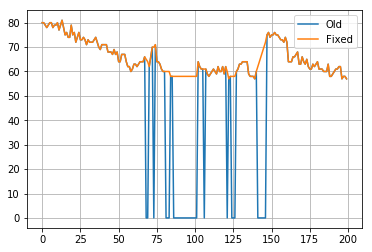

In [219]:
adams_data_good = fill_zeros(adams_data)

plt.plot(adams_data[:200], label = 'Old')
plt.plot(adams_data_good[:200], label = 'Fixed')
plt.legend()
plt.grid()

In [220]:
print("Number of zeros: %s" % sum(adams_data_good == 0).item())

Number of zeros: 0


## Experimental Encoder-Decoder
### See https://arxiv.org/pdf/1803.09704v4.pdf

![title](encoder_decoder.png)

In [224]:
class RNNencoder(nn.Module):

    def __init__(self, input_size, hidden_size, batch_size = 1):
        super(RNNencoder, self).__init__()
        
        self.input_size = input_size
        self.batch_size = batch_size
        self.hidden_size = hidden_size
        
        self.rnn1 = nn.GRUCell(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, hidden_size)
        self.rnn2 = nn.GRUCell(hidden_size, hidden_size)
        
    def forward(self, sequence, predict = False):
            
        if predict:
            hidden = Variable(torch.randn(1, self.hidden_size))
        else:
            hidden = self.initHidden()
        
        for input in sequence:
            hidden = self.rnn1(input, hidden)
            hidden = self.rnn2(self.fc(hidden), hidden)
            
        return hidden
            
    def initHidden(self):
        return Variable(torch.randn(self.batch_size, self.hidden_size))
    
class RNNdecoder(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNdecoder, self).__init__()
        
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.rnn1 = nn.GRUCell(input_size, hidden_size)
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.rnn2 = nn.GRUCell(hidden_size, hidden_size)
        self.fc2 = nn.Linear(input_size + hidden_size, output_size)
        
    def forward(self, x, hidden):
    
        hidden = self.rnn1(x, hidden)
        hidden = self.rnn2(self.fc1(hidden), hidden)
        
        output = self.fc2(torch.cat((x, hidden), 1))
        
        return output, hidden
    
class EncoderDecoder(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, batch_size = 1, 
                 input_sequence_length = 60, output_sequence_length = 30):
        super(EncoderDecoder, self).__init__()
        
        self.batch_size = batch_size
        self.output_size = output_size
        
        self.encoder = RNNencoder(input_size, hidden_size, batch_size)
        self.decoder = RNNdecoder(input_size, hidden_size, output_size)
        
        self.input_sequence_length = input_sequence_length
        self.output_sequence_length = output_sequence_length
        
    def forward(self, input_sequence, future = 50, plot = True):
        
        input_sequence = input_sequence.view(-1, 1, self.output_size)
        
        hidden = self.encoder(input_sequence, predict = True)
        
        output = input_sequence[-1].view(-1, self.output_size)
        
        future_outputs = [output]
        
        for _ in range(future):
            output, hidden = self.decoder(output, hidden)
            future_outputs.append(output)
        
        future_outputs = torch.Tensor(future_outputs).view(-1, self.output_size) 
        
        if plot:
            all_outputs = torch.cat((input_sequence.view(-1, self.output_size), future_outputs))
            
            plt.plot(input_sequence.view(-1, self.output_size).numpy(), linewidth = 3)
            plt.plot(all_outputs.numpy(), linewidth = 1)
            plt.grid()
        
        return future_outputs
    
    def mytrain(self, data, lr = 0.001, epochs = 500, verbose = True):
        
        criterion = nn.MSELoss()
        #criterion = nn.SmoothL1Loss()
        
        optimizer = optim.Adam(self.parameters(), lr = lr)
        
        try:
            for epoch in range(1, epochs + 1):

                input_sequence, target_sequence = get_batch(data, self.batch_size, 
                                                            self.input_sequence_length, self.output_sequence_length)
                
                hidden_states = self.encoder(input_sequence)

                loss = 0
                outputs = []

                output = input_sequence[-1]

                for i in range(len(target_sequence)):
                    
                    output, hidden_states = self.decoder(output, hidden_states)
                    outputs.append(output)

                    l = criterion(output, target_sequence[i])
                    loss += l

                if verbose:
                    if epoch % 100 == 0:
                        print("Epoch: {}, Loss: {}".format(epoch, loss))
                        
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            
        except KeyboardInterrupt:
            pass
        
    def predict(self, input_sequence, future = 50, plot = True):
        return self.forward(self, input_sequence, future = 50, plot = plot)
            

In [225]:
def get_batch(data, batch_size = 100, input_sequence_length = 60, output_sequence_length = 30):
     
    total_sequence_length = input_sequence_length + output_sequence_length
    
    assert(len(data) > total_sequence_length)
    
    starting_indices = random.sample(range(len(data) - total_sequence_length), batch_size)
    
    input_batches, output_batches = [], []
    
    for i in range(batch_size):
        
        starting_index = starting_indices[i]
        input_end_index = starting_index + input_sequence_length
        output_end_index = input_end_index + output_sequence_length
        
        input_batches.append(data[starting_index:input_end_index][:, None])
        output_batches.append(data[input_end_index:output_end_index][:, None])
        
    # Concatenate along batch dimension (0: input dim, 1: batch dim, 2: output dim)
    return torch.cat(input_batches, 1), torch.cat(output_batches, 1)

In [355]:
input_dimension = 1
hidden_dimension = 128
output_dimension = 1
batch_size = 20

input_sequence_length = 300
output_sequence_length = 50

ed = EncoderDecoder(input_dimension, hidden_dimension, output_dimension, batch_size = batch_size, 
                    input_sequence_length = input_sequence_length, output_sequence_length = output_sequence_length)

In [361]:
ed.mytrain(adams_data_good.view(-1, 1).float(), lr = 0.0003, epochs = 10000)

Epoch: 100, Loss: 2352.08349609375
Epoch: 200, Loss: 2175.38232421875
Epoch: 300, Loss: 1783.384033203125
Epoch: 400, Loss: 1522.6492919921875
Epoch: 500, Loss: 1133.285888671875
Epoch: 600, Loss: 716.3165283203125
Epoch: 700, Loss: 382.403564453125
Epoch: 800, Loss: 246.90701293945312
Epoch: 900, Loss: 282.0862731933594
Epoch: 1000, Loss: 280.9881896972656
Epoch: 1100, Loss: 301.79925537109375
Epoch: 1200, Loss: 285.5671691894531
Epoch: 1300, Loss: 275.44775390625


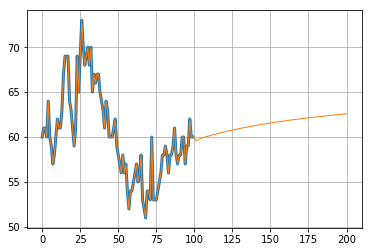

In [362]:
_ = ed(adams_data_good[-100:].view(-1, 1).float(), future = 100)